# Análisis y procesamiento de señales









A continuación se desarrollará una serie de ejercicios en los cuales se manipularán distintas señales a modo de analizar sus propiedades y realizar distintas acciones sobre estas, como reconstruir una señal completamente nueva.

Para esto se utilizará la librería `thinkdsp` de Python, la cual contiene funciones que permiten manipular señales.

## Desarrollo

Se descarga e importa la librería `thinkdsp`.

In [54]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [3]:
from thinkdsp import read_wave, SquareSignal, decorate

### Señal cuadrada

La señal “cuadrada.wav”, que contiene una señal cuadrada, fue muestreada a 1025 muestras/s. Establezca la frecuencia fundamental de la señal, considerando que es posible que la velocidad de muestreo genere aliasing. Reconstruya la señal filtrando las componentes - si es posible - para que no ocurra aliasing, en ese caso.


Primero se descarga la señal y se lee el archivo, para posteriormente normalizar su señal, graficarla y generar el audio.

In [5]:
if not os.path.exists('cuadrada.wav'):
  !wget 'https://raw.githubusercontent.com/JohnBidwellB/procesamiento-digital-senales/tareas/tarea1/audios/cuadrada.wav'


--2021-04-27 02:54:01--  https://raw.githubusercontent.com/JohnBidwellB/procesamiento-digital-senales/tareas/tarea1/audios/cuadrada.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11070 (11K) [audio/wav]
Saving to: ‘cuadrada.wav’

cuadrada.wav        100%[===================>]  10.81K  --.-KB/s    in 0s      

2021-04-27 02:54:01 (110 MB/s) - ‘cuadrada.wav’ saved [11070/11070]



In [6]:
square_signal = read_wave('cuadrada.wav')
square_signal.normalize()
square_signal.make_audio()

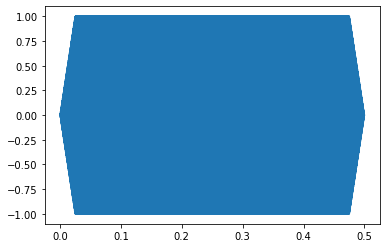

In [7]:
square_signal.plot()

Se visualiza el espectro de la señal:

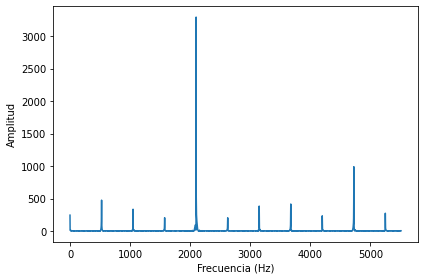

In [8]:
spectrum = square_signal.make_spectrum()
spectrum.plot()
decorate(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

Se obtienen los peaks.

In [10]:
spectrum.peaks()[:20]

[(3293.200488982564, 2099.8095410847086),
 (990.6538429481063, 4725.571376745873),
 (522.7137404707594, 2101.8093596952654),
 (476.2317851645075, 525.9522945764556),
 (440.7665068368664, 4723.571558135316),
 (432.62122091212143, 523.9524759658988),
 (416.874154479914, 3675.6666062035188),
 (384.8419569956128, 3149.714311627063),
 (336.4347466077771, 1049.9047705423543),
 (325.38302911012266, 2103.8091783058226),
 (274.9952687114326, 5249.523852711772),
 (252.54953229112238, 2105.8089969163793),
 (245.42292550431839, 0.0),
 (234.9424248484392, 4199.619082169417),
 (230.7166126696593, 3673.6667875929616),
 (210.04457537274845, 2107.808815526936),
 (205.805028074435, 1575.85706511881),
 (204.6032209458019, 2625.7618356611642),
 (198.87613353391325, 4721.571739524759),
 (184.06543304168613, 4727.57119535643)]

Se observan peaks en torno a las siguientes frecuencias:

*   525 Hz
*   1050 Hz
*   1575 Hz
*   2100 Hz
*   3150 Hz
*   3675 Hz
*   4200 Hz
*   4725 Hz
*   5250 Hz

Del espectro se puede apreciar que la frecuencia fundamental se da a los 2100 Hz y el primer armónico a los 6300 Hz representados en los 4725 Hz.



Para que no ocurra aliasing se reconstruirá la señal primero aplicandole un filtro **pasa alto** y luego un filtro **pasa bajo** de modo que solo exista la frecuencia fundamental.

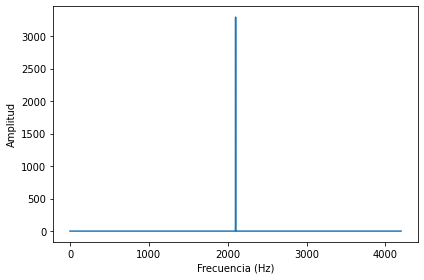

In [11]:
spectrum.high_pass(2099)
spectrum.low_pass(2101)
spectrum.plot(high=4200)
decorate(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

Y finalmente se reconstruye el audio.

In [12]:
rebuild = spectrum.make_wave()
rebuild.normalize()
rebuild.make_audio()

### Señal desconocida

La señal “desconocida.wav” contiene una señal desconocida. A partir de análisis temporales y de espectrograma, describa el tipo de señal encontrada (forma de onda, variación con el tiempo, etc.)

Primero se descarga la señal y se lee el archivo, para posteriormente normalizar su señal, graficarla y generar el audio.

In [13]:
if not os.path.exists('desconocida.wav'):
  !wget 'https://raw.githubusercontent.com/JohnBidwellB/procesamiento-digital-senales/tareas/tarea1/audios/desconocida.wav'

--2021-04-27 02:56:55--  https://raw.githubusercontent.com/JohnBidwellB/procesamiento-digital-senales/tareas/tarea1/audios/desconocida.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81630 (80K) [audio/wav]
Saving to: ‘desconocida.wav’

desconocida.wav     100%[===================>]  79.72K  --.-KB/s    in 0.006s  

2021-04-27 02:56:56 (13.9 MB/s) - ‘desconocida.wav’ saved [81630/81630]



In [14]:
unknown_signal = read_wave('desconocida.wav')
unknown_signal.normalize()
unknown_signal.make_audio()

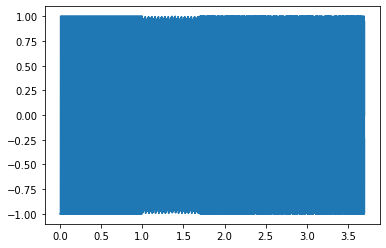

In [16]:
unknown_signal.plot()

En base al gráfico se puede apreciar que hay 3 segmentos que deben ser analizados dentro de la señal.

Para comenzar se analizará el primer segmento de la señal que transcurre entre los segundos 0 y 1.

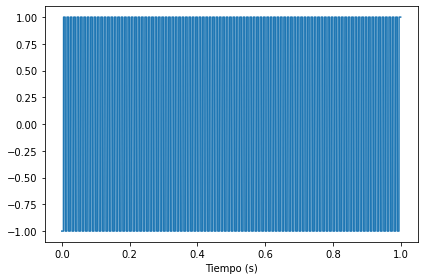

In [18]:
first_segment = unknown_signal.segment(0, 1)
first_segment.plot()
decorate(xlabel='Tiempo (s)')

Visualizamos un segmento menor duración para poder identificar el tipo de señal.

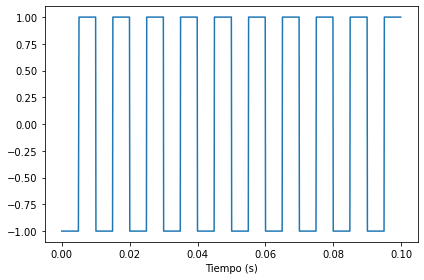

In [19]:
segment = unknown_signal.segment(0, 0.1)
segment.plot()
decorate(xlabel='Tiempo (s)')

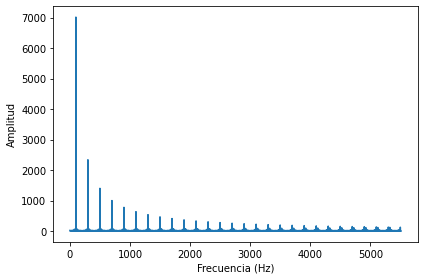

In [20]:
spectrum = first_segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

In [21]:
spectrum.peaks()[:10]

[(7018.744340957696, 100.0),
 (2339.6117159497376, 300.0),
 (1403.8033545138305, 500.0),
 (1002.7556052846714, 700.0),
 (779.9613971040071, 900.0),
 (638.1915297418724, 1100.0),
 (540.0501577983293, 1300.0),
 (468.0858874839071, 1500.0),
 (413.0597462609885, 1700.0),
 (369.62285586965663, 1900.0)]

En base al gráfico se aprecia que corresponde a una señal cuadrada y en base al espectro los armónicos cumplen la condición de la señal cuadrada correspondiendo a los armónicos impares de la frecuencia fundamental, por lo que esta señal no presenta aliasing.

El segundo segmento transcurre entre los segundos 1 y 1,7.

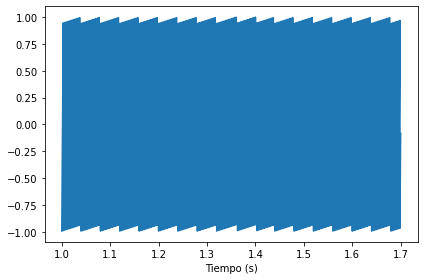

In [22]:
second_segment = unknown_signal.segment(1, 0.7)
second_segment.plot()
decorate(xlabel='Tiempo (s)')

Visualizamos un segmento menor duración para poder identificar el tipo de señal.

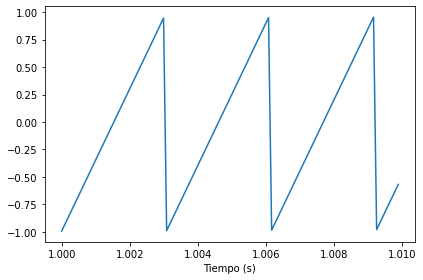

In [24]:
segment = unknown_signal.segment(1, 0.01)
segment.plot()
decorate(xlabel='Tiempo (s)')

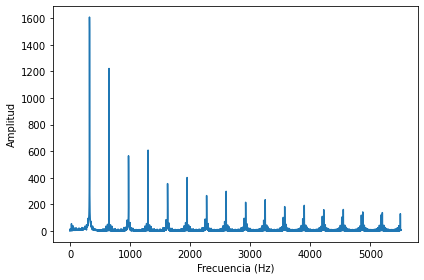

In [25]:
spectrum = second_segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

In [26]:
spectrum.peaks()[:10]

[(1608.9045646395948, 324.3067254114293),
 (1507.913759677478, 325.7353894000259),
 (1222.384020222683, 650.0421148114552),
 (608.4773176587296, 1300.0842296229105),
 (565.9377995888922, 974.3488402228845),
 (526.7533581718887, 322.8780614228327),
 (511.5226840446503, 327.1640533886225),
 (471.18265669379883, 975.7775042114811),
 (402.64537332444013, 1950.1263444343656),
 (357.0387089961598, 1624.3909550343396)]

El segundo segmento de la señal corresponde a una señal sawtooth y no presenta aliasing.

El tercer segmento transcurre desde el segundo 1.7 hasta el final de la señal. 

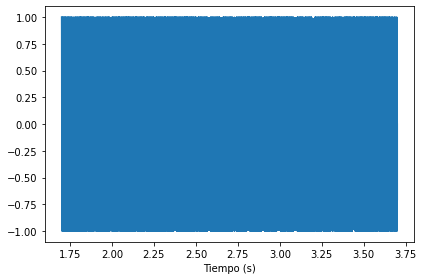

In [28]:
third_segment = unknown_signal.segment(1.7)
third_segment.plot()
decorate(xlabel='Tiempo (s)')

Visualizamos un segmento menor duración para poder identificar el tipo de señal.

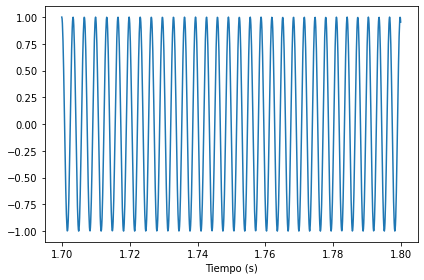

In [29]:
fourth_segment = unknown_signal.segment(1.7, 0.1)
fourth_segment.plot()
decorate(xlabel='Tiempo (s)')

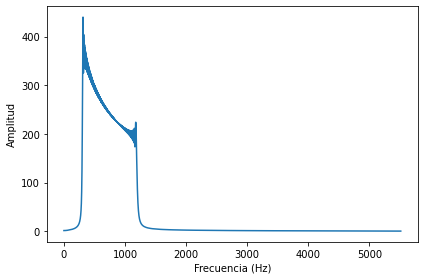

In [30]:
spectrum = third_segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

El último segmento de la señal corresponde a una señal down-chirp.



### Señal incógnita

La señal “incognita.wav” contiene una señal recibida desde el espacio exterior. Se sospecha que es una señal muy débil cubierta de ruido, y que la señal solo puede ser triangular de 1000Hz o 2000Hz, diente de sierra de 1500Hz o cosenoidal de 500Hz. ¿Es cierto? Si lo es, ¿qué señal está enmascarada?

Primero se descarga la señal y se lee el archivo, para posteriormente normalizar su señal, graficarla y generar el audio.

In [31]:
if not os.path.exists('incognita.wav'):
  !wget 'https://raw.githubusercontent.com/JohnBidwellB/procesamiento-digital-senales/tareas/tarea1/audios/incognita.wav'

--2021-04-27 03:02:19--  https://raw.githubusercontent.com/JohnBidwellB/procesamiento-digital-senales/tareas/tarea1/audios/incognita.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22094 (22K) [audio/wav]
Saving to: ‘incognita.wav’

incognita.wav       100%[===================>]  21.58K  --.-KB/s    in 0s      

2021-04-27 03:02:19 (69.4 MB/s) - ‘incognita.wav’ saved [22094/22094]



In [32]:
incognit_signal = read_wave('incognita.wav')
incognit_signal.normalize()
incognit_signal.make_audio()

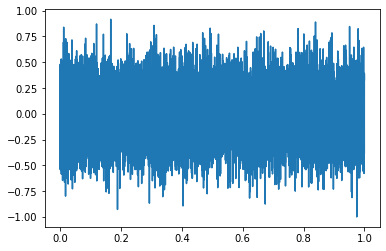

In [33]:
incognit_signal.plot()

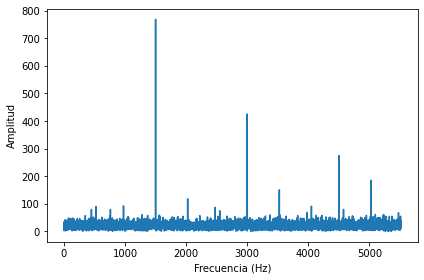

In [34]:
spectrum = incognit_signal.make_spectrum()
spectrum.plot()
decorate(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

Se ve el espectro del poder de la señal para poder identificar el tipo de ruido.

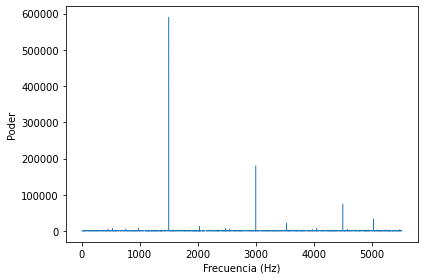

In [37]:
spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Frecuencia (Hz)',
         ylabel='Poder')

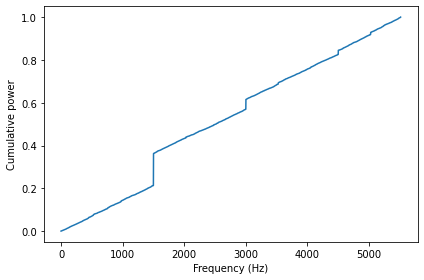

In [38]:
integ = spectrum.make_integrated_spectrum()
integ.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Cumulative power')

El ruido presente en la señal corresponde a un ruido Gaussiano correlacionado.

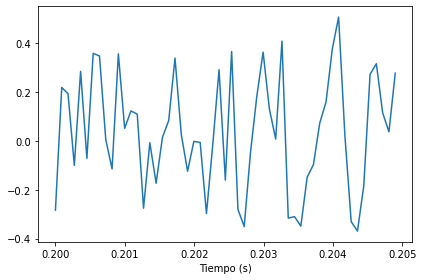

In [39]:
segment = incognit_signal.segment(0.2, 0.005)
segment.plot()
decorate(xlabel='Tiempo (s)')

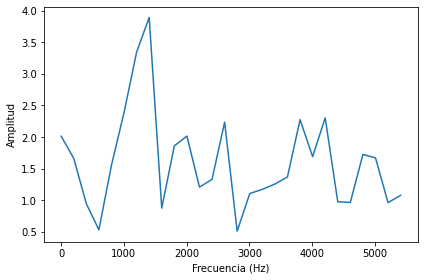

In [40]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

Para verificar a qué tipo de señal corresponde, se construirán las distintas señales para realizar la comparación.

#### Señales triangulares

In [41]:
from thinkdsp import TriangleSignal

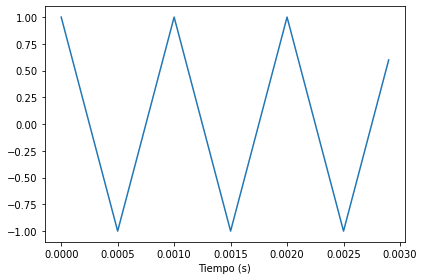

In [43]:
triangle_signal = TriangleSignal(1000)
duration = triangle_signal.period*3
segment = triangle_signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Tiempo (s)')

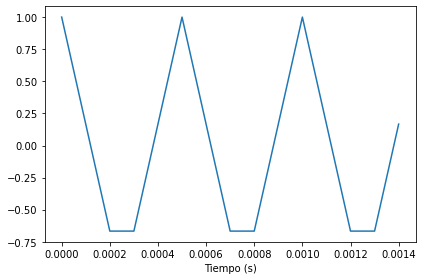

In [45]:
triangle_signal = TriangleSignal(2000)
duration = triangle_signal.period*3
segment = triangle_signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Tiempo (s)')

#### Señal diente de sierra

In [46]:
from thinkdsp import SawtoothSignal

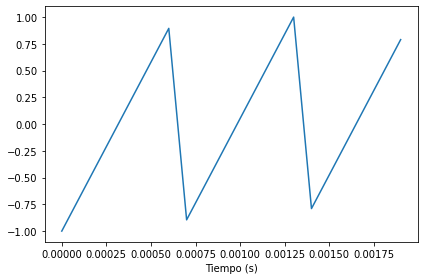

In [49]:
sawtooth_signal = SawtoothSignal(1500)
duration = sawtooth_signal.period*3
segment = sawtooth_signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Tiempo (s)')

#### Señal cosenoidal

In [50]:
from thinkdsp import CosSignal

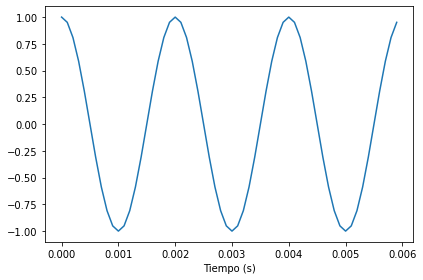

In [53]:
cos_signal = CosSignal(freq=500, amp=1.0, offset=0)
duration = cos_signal.period*3
segment = cos_signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Tiempo (s)')

En base a las comparaciones de las señales, debido a la similitud existente entre los picos y valles de señal, se puede concluir que la señal incógnita enmascara una señal triangular de 2000Hz con un ruido Gaussiano no correlacionado. 

## Conclusiones

A través de los problemas desarrollados se logró analizar diversas propiedades de las señales. En primer lugar se estudió a través del espectro de la señal la propiedad del aliasing en una señal cuadrada y como a través de filtros pasa bajo y pasa alto es posible reconstruir una señal que presenta aliasing de modo que solo esté presente su armónico fundamental.

A continuación se analizó una señal que contiene distintos tipos de señales, identificando en base al espectro y gráficos de porciones de la señal originales, las señales presentes en el audio.

Finalmente en base a una señal presenta ruido, se identifica el tipo de ruido presente en ella con la ayuda del espectro de poder de la señal, para posteriormente tras analizar espectros y gráficos de distintas señales identificar quññae tipo de señal enmascara la señal con ruido.